# Homework 4: Natural Language Processing

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [3]:
MY_UNIQNAME = 'yuqin'

# Download the data:
We will be using a subset of the data from [Project Gutenberg](http://www.gutenberg.org).

>Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of public domain books. The project tries to make these as free as possible, in long-lasting, open formats that can be used on almost any computer., Project Gutenberg reached 57,000 items in its collection of free eBooks.

We will use a [cleaned up corpus](https://github.com/aparrish/gutenberg-dammit) that was processed by [Allison Parish](https://www.decontextualize.com/). This processing step was done to standardize metadata and text encoding. The dataset is described on the [project page](https://github.com/aparrish/gutenberg-dammit#gutenberg-dammit). Note that there are plain text files withing subdirectories numbered with the first three digits of the document ID, and there is also a JSON file of document metadata with title, author, and other information.


We created a reduced subset of 4000 documents for the purpose of this assignment that can be downloaded below:

https://drive.google.com/file/d/1V5ep_5veAccCD-YxGlVfv3DsXczBIvv5/view?usp=sharing

This ZIP file is approximately 550 MB compressed, and 1.45 GB uncompressed.

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
# loading up the language model: English
nlp = spacy.load('en')

## Q1. (10 pts.) Data cleaning
- (3 pts.) Import the downloaded data
- (2 pts.) Convert to lowercase
- (2 pts.) Remove stopwords 
- (2 pts.) Remove punctuation and any other non-alphabet characters

In [5]:
from gutenbergdammit.ziputils import retrieve_one
from gutenbergdammit.ziputils import loadmetadata
import re
import os
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter

metadata = loadmetadata("gutenberg-dammit-files.zip")

In [6]:
def text_clean(book_text):
    
    # Convert to lowercase
    text_low = book_text.lower()
    
    # Remove punctuation and any other non-alphabet characters
    text_low_no_num = re.sub(r'[0-9]', '', text_low)
    
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~''' # list of special characters you want to exclude
    text_low_no_num_no_punc = ""
    for char in text_low_no_num:
        if char not in punctuations:
            text_low_no_num_no_punc = text_low_no_num_no_punc + char
            
    clean_text = text_low_no_num_no_punc.replace(os.linesep, "")
    
    # stop words
    text_nonstop = ""
    words = clean_text.split()
    for word in words:
        if word not in STOP_WORDS:
            text_nonstop = text_nonstop + " " + word 
    
    return text_nonstop

In [ ]:
clean_books = []
for book in metadata:
    book_text = retrieve_one("gutenberg-dammit-files.zip", book["gd-path"])
    book_text = text_clean(book_text)
    clean_books.append(book_text)  

## Q2. (10 pts.) Frequency of Part of Speech (POS) tags
- Use spaCy
  - Use the original (or uncleaned) documents. spaCy does POS tagging better when the sentence is more complete. 
- (4 pts.) Extract POS tags from the first 100 sentences of selected 5 books. 
- (4 pts.) Plot the frequency of POS tags
- (2 pts.) Provide your interpretation

* metadata we have.
{
    "Author": [ "Robert Carlton Brown" ],
    "Author Birth": [ 1886 ],
    "Author Death": [ 1959 ],
    "Author Given": [ "Robert Carlton" ],
    "Author Surname": [ "Brown" ],
    "Copyright Status": [ "Not copyrighted in the United States." ],
    "Language": [ "English" ],
    "LoC Class": [ "SF: Agriculture: Animal culture" ],
    "Num": "14293",
    "Subject": [ "Cookery (Cheese)", "Cheese" ],
    "Title": [ "The Complete Book of Cheese" ],
    "charset": "iso-8859-1",
    "gd-num-padded": "14293",
    "gd-path": "142/14293.txt",
    "href": "/1/4/2/9/14293/14293_8.zip"
}

In [5]:
# By the following codes
# I selected five books written in English by authors who were born at different stage: two from 1700, three from 1800
# 1800 ['Rutherford George Montgomery'] 297/29774.txt
# 1800 ['A. P. (Addison Peale) Russell'] 399/39997.txt
# 1800 ['James Stephens'] 247/24742.txt
# 1700 ['Samuel Rogers'] 135/13586.txt
# 1700 ['John Pendleton Kennedy'] 392/39245.txt

book1_text = retrieve_one("gutenberg-dammit-files.zip", "297/29774.txt")
book2_text = retrieve_one("gutenberg-dammit-files.zip", "399/39997.txt")
book3_text = retrieve_one("gutenberg-dammit-files.zip", "247/24742.txt")
book4_text = retrieve_one("gutenberg-dammit-files.zip", "135/13586.txt")
book5_text = retrieve_one("gutenberg-dammit-files.zip", "392/39245.txt")

In [6]:
# Extract POS tags from the first 100 sentences of selected 5 books.
# for 1800 books
book1 = nlp(book1_text)
book2 = nlp(book2_text)
book3 = nlp(book3_text)
pos_tag_list1800 = list()
for i, sent in enumerate(book1.sents):
    if i<100:
        for token in sent:
            pos_tag_list1800.append(token.pos_)
for i, sent in enumerate(book2.sents):
    if i<100:
        for token in sent:
            pos_tag_list1800.append(token.pos_)
for i, sent in enumerate(book3.sents):
    if i<100:
        for token in sent:
            pos_tag_list1800.append(token.pos_)

# for 1700 books
book4 = nlp(book4_text)
book5 = nlp(book5_text)
pos_tag_list1700 = list()
for i, sent in enumerate(book4.sents):
    if i<100:
        for token in sent:
            pos_tag_list1700.append(token.pos_)
for i, sent in enumerate(book5.sents):
    if i<100:
        for token in sent:
            pos_tag_list1700.append(token.pos_)

In [7]:
# Plot the frequency of POS tags
print(Counter(pos_tag_list1800))                                                      
print(Counter(pos_tag_list1700)) 
pos_tag_1800 = pd.DataFrame(Counter(pos_tag_list1800).most_common(),columns=['pos', 'count'])
pos_tag_1700 = pd.DataFrame(Counter(pos_tag_list1700).most_common(),columns=['pos', 'count'])

pos_tag_1800['perc'] = np.round(pos_tag_1800['count']/pos_tag_1800['count'].sum()*100, decimals = 2)
pos_tag_1700['perc'] = np.round(pos_tag_1700['count']/pos_tag_1700['count'].sum()*100, decimals = 2)

Counter({'PUNCT': 1015, 'NOUN': 1000, 'VERB': 900, 'ADP': 655, 'DET': 620, 'ADJ': 529, 'SPACE': 517, 'PROPN': 439, 'ADV': 303, 'PRON': 276, 'CCONJ': 227, 'PART': 116, 'NUM': 82, 'INTJ': 7, 'X': 1})
Counter({'NOUN': 991, 'ADP': 665, 'PUNCT': 627, 'VERB': 588, 'ADJ': 567, 'DET': 551, 'SPACE': 473, 'PROPN': 285, 'ADV': 187, 'CCONJ': 185, 'PRON': 151, 'PART': 95, 'NUM': 41, 'X': 6, 'INTJ': 4})


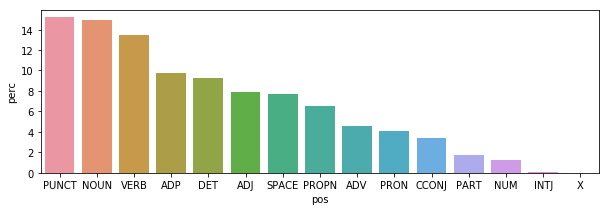

In [8]:
# for 1800
fig, ax = plt.subplots()
fig.set_size_inches(10,3)
a = sns.barplot(x=pos_tag_1800.pos, y=pos_tag_1800.perc)

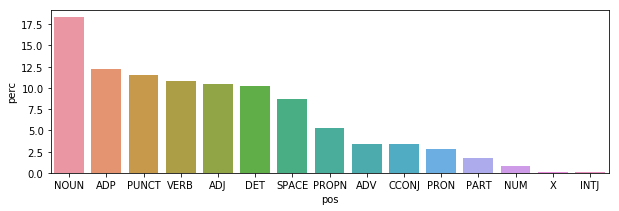

In [9]:
# for 1700
fig, ax = plt.subplots()
fig.set_size_inches(10,3)
b = sns.barplot(x=pos_tag_1700.pos, y=pos_tag_1700.perc)

In [55]:
# (2 pts.) Provide your interpretation
# part-of-speech tagging (POS tagging or PoS tagging or POST)
# also called grammatical tagging or word-category disambiguation

### Explanation:
* I find the most of word-categories like space, propn, adv, cconj, pron, part, num were used in a stable frequency.
* However, books from different times seem to have different characteristics of usage of the words. For example, in the three books from 1800, the most common word category is punctuation while the two books from 1700 used NOUN in the most frequency.
* Another interesting finding from the plots is that 1800 books used a high percentage of VERB compared with the books from 1700.

## Q3. (10 pts.) Make wordclouds for 5 books
- Use the [```word_cloud```](https://github.com/amueller/word_cloud) package.
- (8 pts.) Create a wordcloud for 5 books that you choose.
  - The author of each book should be different.
- (2pts.) Provide your interpretation.

In [30]:
# for book in metadata[300:308]:
#     if book['Language'][0]== "English":
#             print(book["Author"], book["Title"], book["gd-path"])        
# ['Samuel G. (Samuel Griswold) Goodrich'] ['Curiosities of Human Nature'] 393/39333.txt
# ['Archibald Marshall'] ['A Spring Walk in Provence'] 460/46035.txt
# ['Baron Hallam Tennyson Tennyson'] ['Jack and The Bean-Stalk\tEnglish Hexameters'] 452/45288.txt
# ['M. F. (Milburg Francisco) Mansfield'] ['The Cathedrals and Churches of the Rhine'] 319/31936.txt
# ['Horatio Alger'] ['Joe the Hotel Boy'] 005/00528.txt
book1_text = retrieve_one("gutenberg-dammit-files.zip", "297/29774.txt")
book2_text = retrieve_one("gutenberg-dammit-files.zip", "460/46035.txt")
book3_text = retrieve_one("gutenberg-dammit-files.zip", "452/45288.txt")
book4_text = retrieve_one("gutenberg-dammit-files.zip", "319/31936.txt")
book5_text = retrieve_one("gutenberg-dammit-files.zip", "392/39245.txt")
all_book_text = book1_text + book2_text + book3_text + book4_text + book5_text

In [28]:
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

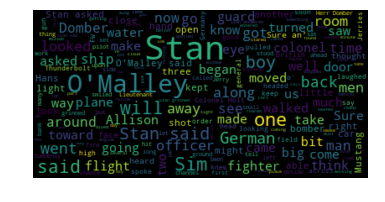

In [48]:
# Generate a word cloud image
# ['Samuel G. (Samuel Griswold) Goodrich'] ['Curiosities of Human Nature'] 393/39333.txt
wordcloud = WordCloud(max_font_size=40).generate(book1_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

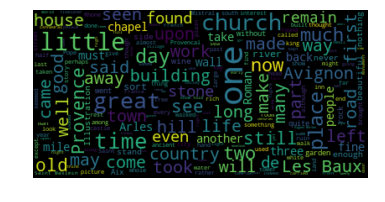

In [50]:
# ['Archibald Marshall'] ['A Spring Walk in Provence'] 460/46035.txt
wordcloud = WordCloud(max_font_size=40).generate(book2_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

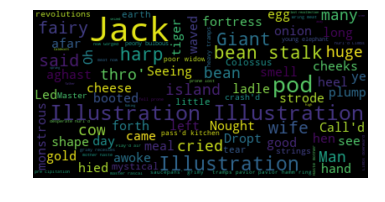

In [51]:
# ['Baron Hallam Tennyson Tennyson'] ['Jack and The Bean-Stalk\tEnglish Hexameters'] 452/45288.txt
wordcloud = WordCloud(max_font_size=40).generate(book3_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

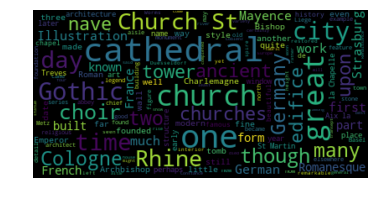

In [52]:
# ['M. F. (Milburg Francisco) Mansfield'] ['The Cathedrals and Churches of the Rhine'] 319/31936.txt
wordcloud = WordCloud(max_font_size=40).generate(book4_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

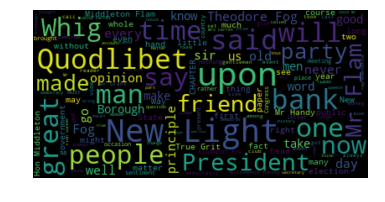

In [53]:
# ['Horatio Alger'] ['Joe the Hotel Boy'] 005/00528.txt
wordcloud = WordCloud(max_font_size=40).generate(book5_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
# (2 pts.) Provide your interpretation
# part-of-speech tagging (POS tagging or PoS tagging or POST)
# also called grammatical tagging or word-category disambiguation

### Explanation:
* I find if we understand the wordcloud with the help of the titles of books, I can quickly get a glimpse of the general content of the book.
* Image 1: In the first image for the book *Curiosities of Human Nature*, we can tell this books may be about some stories that are related with "Curiosities of Human Nature" because there are some "shots", "fights" and "moved" happening. Also some words like "plane", "flight", and "ship" showing up in the word cloud image indicate that this book may cover some travelling topics.
* We can find the connection between the usage of words and the topic or genre of the book. In the image 2: This book *A Spring Walk in Provence* is about a spring journey recorded by the author who was a journalist, so it seems to be obvious why there are a lot of location words like "building", "church", "house", "Avignon" and "provence" showing in the image. In the image 3, the book is a fairy tale about a boy, gaint and magic beans, which displayed clearly in the word cloud where words "illustration", "fairy", "Jack", "pod", "bean", "stalk", "huge" and "gaint" showed frequently. In the image five, I find the topic of book is related with roles of people which is indicated by the frequent usages of words like "party", "whig" and "president". In fact, this book is indeed about the adventure of a boy named Joe who explored his own way in the world.
* In the image 2, 3, and 4, we can find that, generally, the words showing in the titles of books will also become the common words used in the books' text. 


## Q4. (bonus 5 pts.) Train your own word2vec vector.
- Use the ```gensim``` package
  - Your input will be the output from Q1 (cleaned data)
- Hint: You can look into this tutorial for training the new Word2Vec model: https://rare-technologies.com/word2vec-tutorial/
- Use default parameters when you train the Word2Vec model (e.g., ```min_count```, ```size```, etc.), except the number of workers (```workers=?```) parameter.
- Use this model for the later questions. 
  - **If you do not have your Word2Vec model, please use the pre-trained model that we used for the lab to answer the later questions**

In [2]:
# https://rare-technologies.com/word2vec-tutorial/
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# prepare the input
clean_text = ""
for book in metadata[0:100]:
    clean_text = clean_text + text_clean(book["gd-path"])

NameError: name 'metadata' is not defined

In [19]:
clean_text = clean_text + clean_text3 + clean_text5 + clean_text6 + clean_text7 + clean_text9
# The last of the major parameters: worker - is for training parallelization, to speed up training:
my_model = gensim.models.Word2Vec(clean_text, workers=4)
my_model.save('/Desktop/mymodel')

## Q5. (10 pts.) Similarity from Word2Vec 
- Choose 5 words
- (5pts.) What are the top-10 similar words of each?
- (5pts.) Do you find anything odd or interesting? Please explanation. 
  - (if you have your own word2vec model)How the results are different from the pre-trained model that we used in the lab?

In [7]:
# success fail 
# man woman
# solitude

# What are the top-10 similar words of each?
def similar_words(list):
    similar_word_list = []
    for word in list:
        similar_word_list.append(word[0])
    print(similar_word_list)
    
# pre-trained model used in the lab
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)
similar_words(w2v_mod.similar_by_word('success'))
similar_words(w2v_mod.similar_by_word('fail'))
similar_words(w2v_mod.similar_by_word('man'))
similar_words(w2v_mod.similar_by_word('woman'))
similar_words(w2v_mod.similar_by_word('solitude'))

2018-10-24 09:30:12,911 : INFO : loading projection weights from GoogleNews-vectors-negative300-SLIM.bin
2018-10-24 09:30:16,252 : INFO : loaded (299567, 300) matrix from GoogleNews-vectors-negative300-SLIM.bin
2018-10-24 09:30:16,253 : INFO : precomputing L2-norms of word weight vectors


['successes', 'successful', 'Success', 'succes', 'accomplishment', 'achievements', 'achievement', 'triumphs', 'accomplishments', 'succesful']
['fails', 'failed', 'failure', 'Failing', 'failing', 'Failure', 'Failed', 'Fail', 'refuse', 'falter']
['woman', 'boy', 'teenager', 'girl', 'robber', 'men', 'guy', 'person', 'gentleman', 'motorcyclist']
['man', 'girl', 'teenager', 'lady', 'mother', 'policewoman', 'boy', 'Woman', 'she', 'WOMAN']
['serenity', 'quietude', 'stillness', 'tranquility', 'aloneness', 'restfulness', 'loneliness', 'peacefulness', 'lonely', 'contemplation']


In [12]:
# trained model
# my_model.similar_by_word('success')
# my_model.similar_by_word('fail')
# my_model.similar_by_word('man')
# my_model.similar_by_word('woman')
# my_model.similar_by_word('solitude')

In [13]:
# Do you find anything odd or interesting? Please explanation

### Explanation:
* for the pre-trained model, we find for the top 10 similar words are the mostly Synonyms and different intense of the word or the plural version of the word. For the word "man" and "woman", the top 10 similar words contain Antonymstense. One interesting finding is that the similar words for "man" include "robber", "gentleman", and "motorcyclist" while the similar words for "woman" include "mother" and "policewoman", where we can tell some social understandings for those two words. 

## Q6. (15 pts.) Similarity between chapters 
- (5 pts.) Pick 5 chapters from the dataset and describe.
  - Each "chapter" consists of 10 consecutive paragraphs from a single book.
  - The author of each chapter should be different.
  - If necessary, explain how you defined "paragraph". 
- (5 pts.) Calculate the average of vectors for the words included in a chapter.  
  - In this way, you can have a vector that can roughly summarize the contents.    
  - The average vector should have the same dimensionality with word vectors 
    - e.g., if the word vector is a 100 dimension, the average vector for paragraph should be a 100 dimension as well
  - Words should come from the results of Q1 (cleaned out data) (i.e. should not contain stopwords or other special characters).
- (5 pts.) Calculate the similarity between chapters.  
  - Provide your interpretation. 
  - Why do you think some chapters are similar/dissimilar to others?

In [8]:
# five books:
# ['John Dewey'] ['Democracy and Education: an introduction to the philosophy of education'] 008/00852.txt
# ['Richard Harding Davis'] ["Episodes in Van Bibber's Life"] 003/00334.txt
# ['H. Rider Haggard'] ['WHEN THE WORLD SHOOK Being an Account of the Great Adventure of Bastin'] 013/01368.txt
# ['Baron Edward Bulwer Lytton Lytton'] ['The Last of the Barons — Complete'] 077/07727.txt
# ['Gilbert Parker'] ['The Seats of the Mighty, Volume 3'] 062/06226.txt
book1_text = retrieve_one("gutenberg-dammit-files.zip", "008/00852.txt")
book2_text = retrieve_one("gutenberg-dammit-files.zip", "003/00334.txt")
book3_text = retrieve_one("gutenberg-dammit-files.zip", "013/01368.txt")
book4_text = retrieve_one("gutenberg-dammit-files.zip", "077/07727.txt")
book5_text = retrieve_one("gutenberg-dammit-files.zip", "062/06226.txt")

# select 5 chapters from each book 
def chapter_selection(text):
    sentence_end = ['.','?','!','"']
    chapter = text.split("\n\n\n")
    para_list = []
    for para in chapter: 
        paragraph = para.split("\n\n")
        if len(paragraph) > 30:
            if paragraph[-1][-1][-1] in sentence_end:
                para_list.append(para)
    chapter = para_list[0]
    ten_paras = chapter.split("\n\n")[3:13]
    para_text = ""
    for para in ten_paras:
        para_text = para_text + para
    return para_text

book1_chapter = chapter_selection(book1_text)
book2_chapter = chapter_selection(book2_text)
book3_chapter = chapter_selection(book3_text)
book4_chapter = chapter_selection(book4_text)
book5_chapter = chapter_selection(book5_text)

In [55]:
# how to define paragraph? \n\n

### Explanation for the chapter selection:
* I found this break line punctuation is used for separating new chapters and paragraphs. Two break-line punctuations will be used for separating paragraphs while two or more break-line punctuations will be used for chapter separations. 
* Thus, I first roughly split the text of the book by the "\n\n\n" and then use "\n\n" to separate paragraph. And I found some of the output contains some book-related information like chapter lists or author introductions, which are not what I want. So I filtered the "chapters" that are not ended with sentence end punctuations like '.', '?', '!', and '""'. 
* For avoiding unnecessary content like titles of chapters, I only selected the chapters that have more than 20 sentences and then filtered the first two sentences which based my observation, those sentences highly possibly are meaningless.

In [9]:
# Calculate the average of vectors for the words included in a chapter.

def chapter_average(book_text):
    text = text_clean(book_text)
    doc = text.split()
    model = gensim.models.Word2Vec([doc])
    words = filter(lambda x: x in model.wv.vocab, doc)
    chapter_vectors = []
    for word in words:
        word_vector = np.array(model[word])
        chapter_vectors.append(word_vector)
    chapter_vector_avg = sum(chapter_vectors)/len(chapter_vectors)   
    return np.array(chapter_vector_avg)
   
avg1 = chapter_average(book1_chapter)
avg2 = chapter_average(book2_chapter)
avg3 = chapter_average(book3_chapter)
avg4 = chapter_average(book4_chapter)
avg5 = chapter_average(book5_chapter)

2018-10-24 09:30:35,256 : INFO : collecting all words and their counts
2018-10-24 09:30:35,257 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-24 09:30:35,258 : INFO : collected 457 word types from a corpus of 638 raw words and 1 sentences
2018-10-24 09:30:35,259 : INFO : Loading a fresh vocabulary
2018-10-24 09:30:35,260 : INFO : min_count=5 retains 12 unique words (2% of original 457, drops 445)
2018-10-24 09:30:35,260 : INFO : min_count=5 leaves 100 word corpus (15% of original 638, drops 538)
2018-10-24 09:30:35,261 : INFO : deleting the raw counts dictionary of 457 items
2018-10-24 09:30:35,262 : INFO : sample=0.001 downsamples 12 most-common words
2018-10-24 09:30:35,263 : INFO : downsampling leaves estimated 11 word corpus (11.9% of prior 100)
2018-10-24 09:30:35,263 : INFO : estimated required memory for 12 words and 100 dimensions: 15600 bytes
2018-10-24 09:30:35,264 : INFO : resetting layer weights
2018-10-24 09:30:35,265 : INFO : training m

In [10]:
# Calculate the similarity between chapters.
from scipy import spatial
def cosine_similarity(x, y):
    return 1- spatial.distance.cosine(x, y)

similarity = ["one and other",
              cosine_similarity(avg1, avg2),
              cosine_similarity(avg1, avg3),
              cosine_similarity(avg1, avg4),
              cosine_similarity(avg1, avg5),
              "two and other",
              cosine_similarity(avg2, avg1),
              cosine_similarity(avg2, avg3),
              cosine_similarity(avg2, avg4),
              cosine_similarity(avg2, avg5),
              "three and other",
              cosine_similarity(avg3, avg1),
              cosine_similarity(avg3, avg2),
              cosine_similarity(avg3, avg4),
              cosine_similarity(avg3, avg5),
              "four and other",
              cosine_similarity(avg4, avg1),
              cosine_similarity(avg4, avg2),
              cosine_similarity(avg4, avg3),
              cosine_similarity(avg4, avg5),
              "five and other",
              cosine_similarity(avg5, avg1),
              cosine_similarity(avg5, avg2),
              cosine_similarity(avg5, avg3),
              cosine_similarity(avg5, avg4)]
for value in similarity:
    print(value)

one and other
0.05554231256246567
-0.026985256001353264
0.07315655797719955
-0.007909812964498997
two and other
0.05554231256246567
0.033983856439590454
0.04542293772101402
-0.15996912121772766
three and other
-0.026985256001353264
0.033983856439590454
-0.013357899151742458
0.11597072333097458
four and other
0.07315655797719955
0.04542293772101402
-0.013357899151742458
0.042046770453453064
five and other
-0.007909812964498997
-0.15996912121772766
0.11597072333097458
0.042046770453453064


### Explanation:
* The larger absolute value means more similarity. From the result I calculated, I found book five and book four has the best score for the similar, and other similar books are book four and book two. 
* To figure out why chapters from book five and book four got the best scores of similarity and why the two chapters from book two and four are similar, I searched the main contents of three book. Book two is *Episodes in Van Bibber's Life*, which was written by Davis, Richard Harding. It is a romantic fiction about Van Bibber. Book four is *The Last of the Barons - Complete* which was written by Edward Bulwer-Lytton. Romance and science in the Middle Ages are one of the themes of the novel. So those two chapters have the similar topic, and two authors live in a similar age, and both of them are playwriter. Book five is *The Seats of the Mighty, Volume 3*, which was another romance novel. This book was the #3 best seller for 1896. The setting is the Seven Years War in Quebec. Those may count for the similarity of those chapters.

## Q7. (15 pts.) Identify biases in word embeddings
- (8pts.) Which words from the model show the strongest skew along the each bias scales?
  - hint: Look for the interpretable semantic scaling part from the last Lab (Section 2-3)
  - Search for the words from your Word2Vec model that would locate in the scale's each end
    - e.g., which words are more male/female? 
  - Use following semantic scales
    - *Gender (female:male)*
    - *Age (young:old)*
  - Provide your interpretation
- (7pts.) Pick the top 100 similar words with the word *information*. 
  - Plot these words in a 2-dimensional scale. 
  - Each axis is a bias scale from above (gender and age). 
  - Provide your interpretation


In [12]:
#  several word embedding models: word2vec and GloVe 
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)

# Gender: male -0.28237101435661316
scale_male_female = w2v_mod['female'] - w2v_mod['male']
cosine_similarity(w2v_mod['man'], scale_male_female) 
more_male = []
more_female = []
for word in w2v_mod.wv.vocab:
    if cosine_similarity(w2v_mod[word], scale_male_female) > 0.2:
        if  nltk.tag.pos_tag([word])[0][-1] in ["VBN", "VBG", "JJ"]:
            more_male.append(word)
#         print(nltk.tag.pos_tag([word])[0][-1])
for word in w2v_mod.wv.vocab:
    if cosine_similarity(w2v_mod[word], scale_male_female) < -0.2:
         if  nltk.tag.pos_tag([word])[0][-1] in ["VBN", "VBG", "JJ"]:
            more_female.append(word)
        
print("more male: ", more_male)
print("more female: ", more_female)

# Age: young:old 0.539706289768219
scale_old_young = w2v_mod['young'] - w2v_mod['old']
cosine_similarity(w2v_mod['young'], scale_old_young)
more_young = []
more_old = []
for word in w2v_mod.wv.vocab:
    if cosine_similarity(w2v_mod[word], scale_old_young) > 0.25:
        if  nltk.tag.pos_tag([word])[0][-1] in ["VBN", "VBG", "JJ"]:
            more_young.append(word)
#         print(nltk.tag.pos_tag([word])[0][-1])
for word in w2v_mod.wv.vocab:
    if cosine_similarity(w2v_mod[word], scale_old_young) < -0.18:
         if  nltk.tag.pos_tag([word])[0][-1] in ["VBN", "VBG", "JJ"]:
            more_old.append(word)
        
print("younger: ", more_young)
print("older: ", more_old)

2018-10-24 09:33:08,019 : INFO : loading projection weights from GoogleNews-vectors-negative300-SLIM.bin


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Apple/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


2018-10-24 09:33:11,247 : INFO : loaded (299567, 300) matrix from GoogleNews-vectors-negative300-SLIM.bin
/Users/Apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/Users/Apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


more male:  ['former', 'elected', 'toured', 'Elected', 'Ousted', 'trailblazing', 'Deposed']
more female:  ['fished', 'uncircumcised', 'liming', 'herbivorous', 'subcortical', 'unvalidated', 'pileated', 'lymphocytic', 'reductionistic', 'unmissed', 'sludging', 'flued']


/Users/Apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/Users/Apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


younger:  ['young', 'talented', 'educated', 'recruited', 'skilled', 'inspiring', 'inexperienced', 'disadvantaged', 'empowering', 'marginalized', 'nurturing', 'hardworking', 'motivating', 'enlightened', 'mentored', 'uneducated', 'disaffected', 'impressionable', 'disempowered', 'undereducated', 'skilling', 'marriageable', 'priviledged', 'Alienating', 'Disaffected', 'Perceiving', 'discipling', 'recruitable', 'Impressionable', 'Coddled', 'Sensitizing', 'catechizing']
older:  ['last', 'old', 'dated', 'outdated', 'strangled', 'Zachary', 'gelding', 'unresponsive', 'electrician', 'antiquated', 'bludgeoned', 'reverting', 'refitted', 'predating', 'Pomeranian', 'semiretired', 'circumnavigated', 'masted', 'nonconsecutive', 'Ronal', 'readopted', 'noncallable', 'plumetted']


### Explanation:
* when the value is positive, it means the world is more similar to "female" vice versa.
* For the word "male", the similarity score is -0.28237101435661316. So the range of female to male scale is [-0.28, 0.28] For the word "man", the similarity score is -0.20277941226959229. Thus, I selected the words that get the score larger than 0.20 or smaller than -0.20 to indicate that the word is more female or male.
* I selected the words that have the POS tag - VEB and ADJ to see which of them show the strongest skew along the gender scale and age scale.
* From the words I selected that are more male, I can tell some words are the products of patriarchal society like elected, trailblazing, and former. Female words tend to be more nagative like sluding, unvalidated. 
* From the words I selected by the age scale, we can conclude some characteristics that may be found on younger and older people; it seems like that younger words are more positive than the older words.

2018-10-24 09:40:02,494 : INFO : precomputing L2-norms of word weight vectors


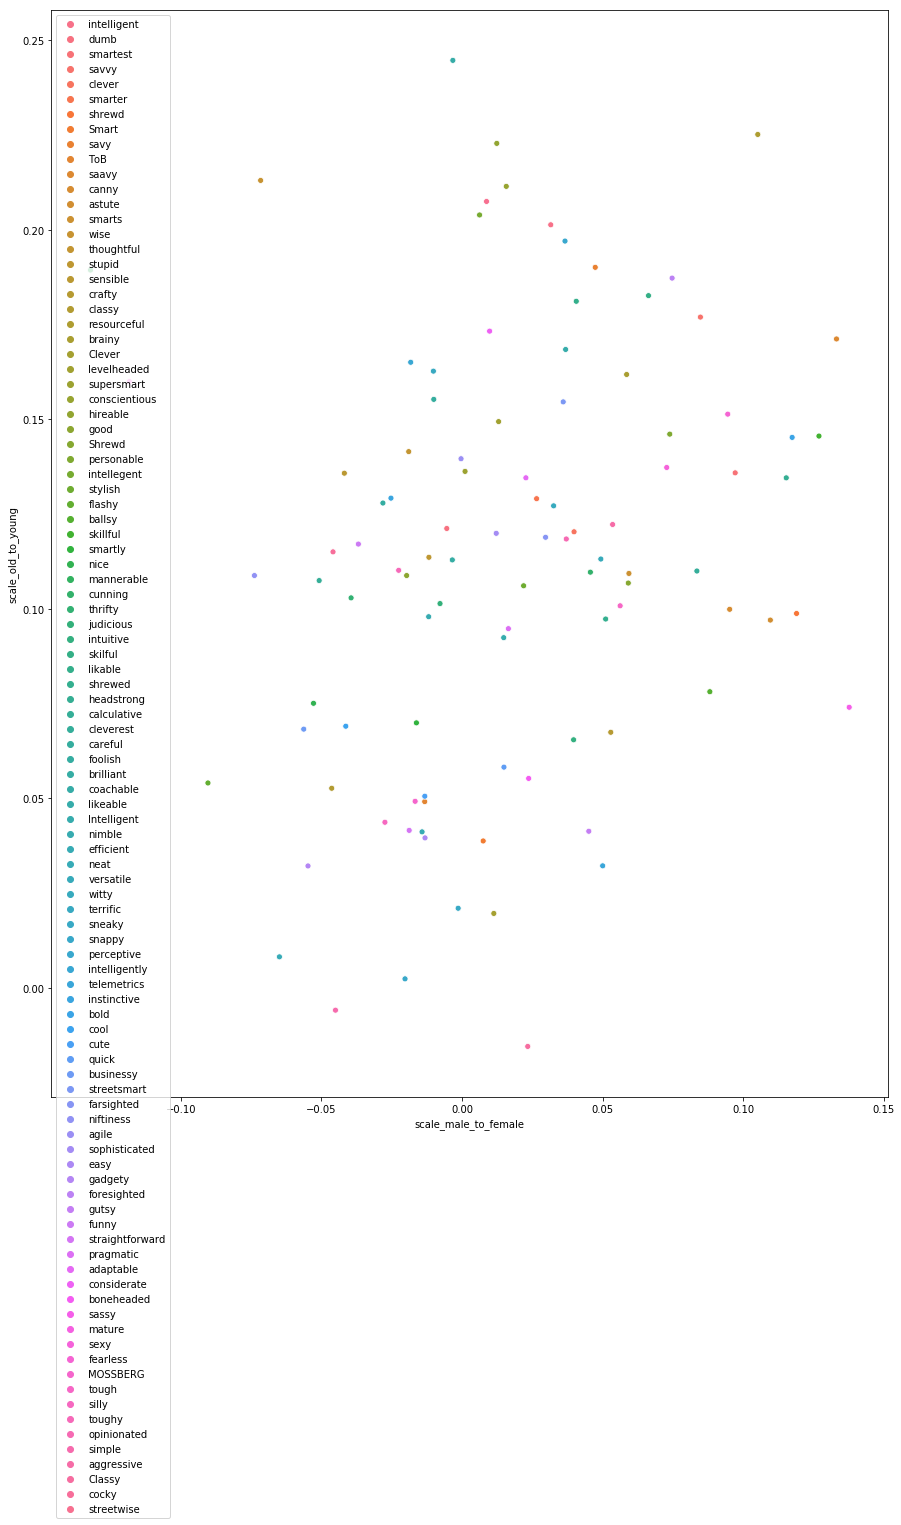

In [13]:
# Pick the top 100 similar words for "smart"
top_100_words = w2v_mod.similar_by_word('smart', topn = 100)

# Plot these words in a 2-dimensional scale.
# Each axis is a bias scale from above (gender and age).
scale_male_female = w2v_mod['female'] - w2v_mod['male']
scale_old_young = w2v_mod['young'] - w2v_mod['old']

similarity_list = []
word_list = []
for word in top_100_words:
    word = word[0]
    word_list.append(word)
    word_similarity = [cosine_similarity(w2v_mod[word], scale_male_female), cosine_similarity(w2v_mod[word], scale_old_young)]
    similarity_list.append(word_similarity)
    
pol_words_sim_2d = pd.DataFrame(similarity_list, index=word_list, columns=['scale_male_to_female', 'scale_old_to_young'])
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(15,20)
sns.scatterplot(x='scale_male_to_female', y='scale_old_to_young', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)

### Provide your interpretation
### Explanation:
* For x-axis, when the value is positive, it means the world is more similar to "female" vice versa. For y-axis, when the value is positive, it means the world is more similar to "young" vice versa.
* I found that the similiar words for "smart" generally tend to be younger because basically, the all values of them are over zero.
* I also found that the similar words for smart that are more male tend to be older than the words that are more female.

## Q8. (10 pts.) Word clustering
- Pick top-100 similar words with the word *information*.  
- Calculate cosine similarity scores between words
  - e.g., Create a 100x100 matrix that contains cosine similarity scores. Each row and columns should be words. 
- Use seaborn's [```.clustermap()```](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function to draw a hierarchically-clustered heatmap
- Provide your interpretation

In [42]:
# Pick the top 100 similar words for "calm"
top_100_words = w2v_mod.similar_by_word('calm', topn = 100)

# Calculate cosine similarity scores between words
# 100x100 matrix
word_list = []
for word in top_100_words:
    word = word[0]
    word_list.append(word)
    
data = [] 
for word in word_list:
    similarity_list = []
    score = w2v_mod[word]
    for w in word_list:
        word_similarity = cosine_similarity(score, w2v_mod[w])
        similarity_list.append(word_similarity)
    data.append(similarity_list)
pol_words_sim_matrix = pd.DataFrame(data, index=word_list, columns=word_list)
pol_words_sim_matrix

,Calm,calmed,calmness,calming,calmer,quiet,calms,levelheaded,unruffled,serenity,...,pacify,stillness,restrained,unsettled,poise,reassuring,frantic,turbulent,Unfailingly,resolute
Calm,1.000000,0.527081,0.450762,0.480576,0.483081,0.404384,0.464151,0.384586,0.340140,0.389687,...,0.181653,0.288419,0.223673,0.245536,0.251984,0.243711,0.213689,0.264573,0.352728,0.293544
calmed,0.527081,1.000000,0.367319,0.623660,0.587186,0.403233,0.638774,0.274770,0.356969,0.245419,...,0.313501,0.153707,0.375600,0.365967,0.209002,0.333713,0.264520,0.277612,0.258415,0.195125
calmness,0.450762,0.367319,1.000000,0.497830,0.430612,0.403989,0.407971,0.381188,0.360601,0.629824,...,0.137058,0.509261,0.239544,0.283082,0.597387,0.241266,0.254584,0.276483,0.264030,0.315079
calming,0.480576,0.623660,0.497830,1.000000,0.514380,0.410457,0.621166,0.295539,0.258087,0.409013,...,0.301099,0.336588,0.311762,0.257883,0.181176,0.474737,0.239817,0.286491,0.234975,0.172713
calmer,0.483081,0.587186,0.430612,0.514380,1.000000,0.432788,0.449312,0.328837,0.331551,0.332675,...,0.248236,0.213487,0.315080,0.404032,0.203343,0.275529,0.305785,0.385705,0.260736,0.222159
quiet,0.404384,0.403233,0.403989,0.410457,0.432788,1.000000,0.339209,0.406461,0.392214,0.457470,...,0.214207,0.394118,0.319919,0.331348,0.262226,0.342572,0.285177,0.303204,0.309814,0.298263
calms,0.464151,0.638774,0.407971,0.621166,0.449312,0.339209,1.000000,0.281733,0.280636,0.351584,...,0.223835,0.296190,0.232670,0.285267,0.145543,0.305823,0.251275,0.244403,0.214334,0.142641
levelheaded,0.384586,0.274770,0.381188,0.295539,0.328837,0.406461,0.281733,1.000000,0.358777,0.211782,...,0.138269,0.109751,0.325196,0.187257,0.360505,0.298389,0.227533,0.218516,0.458564,0.369784
unruffled,0.340140,0.356969,0.360601,0.258087,0.331551,0.392214,0.280636,0.358777,1.000000,0.244781,...,0.166076,0.214842,0.373566,0.437490,0.331439,0.317818,0.250033,0.204161,0.342084,0.452961
serenity,0.389687,0.245419,0.629824,0.409013,0.332675,0.457470,0.351584,0.211782,0.244781,1.000000,...,0.136590,0.685860,0.119683,0.192911,0.277693,0.216594,0.161416,0.256707,0.286113,0.184393


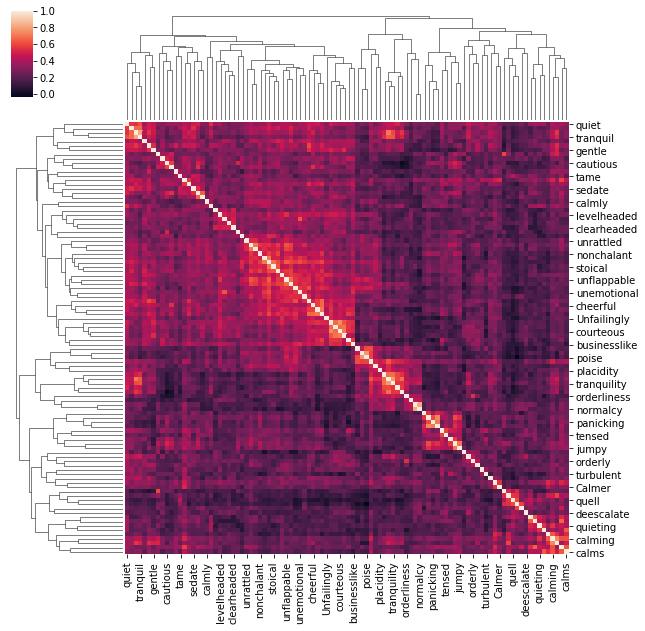

In [47]:
# Use seaborn's .clustermap() function to draw a hierarchically-clustered heatmap
sns.clustermap(pol_words_sim_matrix)

### Provide your interpretation
### Explanation:
* The ligter color means the larger value, which also means the higher similarity.
* I found there are several lighter color squares in the image, which indicated that those word clusters are similar with each other than other part of words, like panicking and tensed, quiet and tranquil.